### Part B : News Article Classification
#### 1. Overview
In today’s digital world, news articles are constantly being generated and shared across
different platforms. For news organizations, social media platforms, and aggregators,
classifying articles into specific categories such as sports, politics, and technology can help
improve content management and recommendation systems. This project aims to develop a
machine learning model that can classify news articles into predefined categories, such as
sports, politics, and technology, based on their content.
By automating this process, organizations can efficiently categorize large volumes of news
articles, making it easier for readers to access relevant information based on their interests.
#### 2. Problem Statement
The primary objective of this project is to build a classification model that can automatically
categorize news articles into different predefined categories. The model will be trained using
a labeled dataset of news articles and will output the most likely category (e.g., sports,
politics, or technology) for any given article.
##### The goal is to:
* Develop a robust classifier capable of handling articles from multiple categories.
* Preprocess the text data, extract meaningful features, and train models to classify the
articles.
* Evaluate the model performance and provide actionable insights on how well it
classifies articles.
#### Dataset Information
The dataset can be used from [data_news](https://docs.google.com/spreadsheets/d/1m4YMfqQxo_DcbtzGqbfZitvJmytbWUE8qjixhHmtadk/edit?pli=1&gid=1552269726#gid=1552269726)

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Upload the dataset
url = 'https://docs.google.com/spreadsheets/d/1m4YMfqQxo_DcbtzGqbfZitvJmytbWUE8qjixhHmtadk/export?format=csv&gid=1552269726#'
df = pd.read_csv(url)
# Display the few rows of data
df.head(5)

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [6]:
df.duplicated().sum()

4251

In [7]:
duplicate = df[df.duplicated()]
duplicate

,category,headline,links,short_description,keywords
40027,BUSINESS,The 10 Cities With The Longest Work Weeks,https://www.huffingtonpost.com/entry/cities-lo...,Feeling overworked? Moving to a different city...,cities-longest-work-weeks
40089,BUSINESS,10 States Where People Drink The Most Beer,https://www.huffingtonpost.com/entry/states-be...,(Hat tip: UPI) We are a nation of beer drinker...,states-beer-per-capita-consumption
40095,BUSINESS,"Women in Business: Q&A with Venus Hurst, Found...",https://www.huffingtonpost.com/entry/women-in-...,Venus Hurst is no stranger to entrepreneurship...,women-in-business-qa-with
40119,BUSINESS,Hiring Guru: Nationwide Debt Direct Hires for ...,https://www.huffingtonpost.com/entry/hiring-gu...,Jeffrey DeLage is Chief Operating Officer of N...,hiring-guru-nationwide-de
40134,BUSINESS,10 Things To Immediately Do If You Want Your S...,https://www.huffingtonpost.com/entry/10-things...,"According to SBA data, “at least 25% of small ...",10-things-to-immediately-do-if-you-want-your-s...
...,...,...,...,...,...
49992,SPORTS,Terrence Ross Dunk Contest Video: Raptors' Roo...,https://www.huffingtonpost.com/entry/terrence-...,"Whether or not Shaq knew him, Ross figures to ...",terrence-ross-dunk-contest-winner-2013-video
49993,SPORTS,Norovirus Outbreak At Winter Olympics Prompts ...,https://www.huffingtonpost.com/entry/norovirus...,Troops will replace hundreds of civilian secur...,norovirus-outbreak-at-winter-olympics-prompts-...
49994,SPORTS,"Tiger Woods And Rory McIlroy, Honda Classic Li...",https://www.huffingtonpost.comhttp://golfweek....,Tiger Woods is looking to springboard off a 5-...,NaN
49997,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie


In [8]:
count = duplicate['category'].value_counts()
count

category
SPORTS      2342
BUSINESS    1909
Name: count, dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

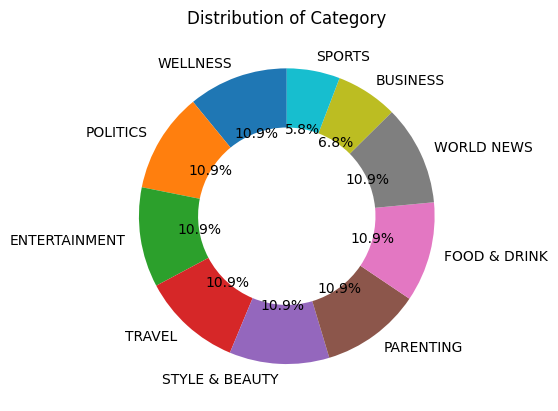

In [10]:
# Donut graph of category
count_cat = df['category'].value_counts()
plt.pie(count_cat, labels=count_cat.index, autopct='%1.1f%%',
       startangle=90, wedgeprops=dict(width=0.4))
plt.title("Distribution of Category")
plt.show()

In [11]:
count_cat

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          3091
SPORTS            2658
Name: count, dtype: int64

In [12]:
# Combine relevant text fields
df['text'] = df['headline']+' '+df['short_description']
print("Headline:\n", df['headline'][1])
print("Short Description:\n",df['short_description'][1])
print("Combine Text:\n",df['text'][1])

Headline:
 Talking to Yourself: Crazy or Crazy Helpful?
Short Description:
 Think of talking to yourself as a tool to coach yourself through a challenge, or to narrate your own experiences to yourself. In any case, treat yourself with respect and you just may find you enjoy your own company.
Combine Text:
 Talking to Yourself: Crazy or Crazy Helpful? Think of talking to yourself as a tool to coach yourself through a challenge, or to narrate your own experiences to yourself. In any case, treat yourself with respect and you just may find you enjoy your own company.


#### Preprocessing Text variable

In [13]:
# Text preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = contractions.fix(text) 
    text = text.lower()
    text = re.sub(r'[^a-z\s]',"",text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [14]:
df['tokens'] = df['text'].apply(preprocess)

In [15]:
print("Text:\n", df['text'][0])
print("Tokens:\n",df['tokens'][0])

Text:
 143 Miles in 35 Days: Lessons Learned Resting is part of training. I've confirmed what I sort of already knew: I'm not built for running streaks. I'm built for hard workouts three to five days a week with lots of cross training, physical therapy and foam rolling. But I've also confirmed that I'm stubborn with myself.
Tokens:
 ['mile', 'day', 'lesson', 'learned', 'resting', 'part', 'training', 'confirmed', 'sort', 'already', 'knew', 'built', 'running', 'streak', 'built', 'hard', 'workout', 'three', 'five', 'day', 'week', 'lot', 'cross', 'training', 'physical', 'therapy', 'foam', 'rolling', 'also', 'confirmed', 'stubborn']


##### TF-IDF (Term Frequency-Inverse Document Frequency) Model

In [16]:
df['clean_token'] = df['tokens'].apply(lambda x:' '.join(x))
df['clean_token'][1]

'talking crazy crazy helpful think talking tool coach challenge narrate experience case treat respect may find enjoy company'

In [17]:
tfidf_vector = TfidfVectorizer()
x_tfidf = tfidf_vector.fit_transform(df['clean_token'])

In [18]:
print("TF-IDF Shape:", x_tfidf.shape)
print(x_tfidf[:5].toarray())

TF-IDF Shape: (45749, 50883)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
print("Features Names Words:")
print(tfidf_vector.get_feature_names_out())

Features Names Words:
['aa' 'aaa' 'aafa' ... 'zyola' 'zywicki' 'zzzs']


#### Word Embeddings (Word2Vec) 

In [20]:
sentences = df['tokens'].tolist()
# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2)
# Check vector for a word
print(w2v_model.wv['good'])
# Find similar words
print(w2v_model.wv.most_similar('good'))

[-3.81238341e-01 -3.90612371e-02  9.00837011e-04  2.93212645e-02
 -1.39527902e-01 -2.86812276e-01  5.22437096e-01  1.78733647e-01
 -7.66025424e-01  3.53120118e-01 -8.30383658e-01 -6.98107421e-01
  4.74177897e-01  1.43015933e+00 -3.76991951e-03 -6.78906322e-01
 -2.67250419e-01  2.47557983e-02  7.63173103e-02 -2.32044053e+00
  1.13407946e+00 -1.93468660e-01 -2.53870517e-01 -5.76406598e-01
  3.82603705e-01 -5.63365638e-01 -7.74916649e-01 -1.05338168e+00
  4.16825026e-01  9.81650710e-01  1.46328986e+00  9.06114638e-01
  5.70084453e-01 -6.09032273e-01 -1.40095556e+00  4.79441360e-02
 -5.81873894e-01  5.12894869e-01  8.11243653e-01 -1.40633440e+00
  1.74512491e-01 -5.72018147e-01  9.76370871e-01  3.55883420e-01
  9.06953812e-01 -6.50282264e-01 -4.45853382e-01 -5.17786860e-01
  1.61383712e+00  4.08694327e-01 -3.23886156e-01 -3.07858497e-01
  1.78244591e-01  8.93194526e-02 -7.06335127e-01  1.05240512e+00
 -6.05759442e-01  2.04105213e-01 -1.23559153e+00  2.15371221e-01
  6.36793852e-01 -9.02282

In [21]:
# Convert each tokens text to average word vector
def get_avg_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]  # Convert each review to average word vector
    if len(vectors) == 0:
        return np.zeros(model.vector_size) # if no known words
    return np.mean(vectors, axis=0)  # average along rows

In [22]:
df['embedding'] = df['tokens'].apply(lambda x:get_avg_vector(x,w2v_model))

In [23]:
df['embedding'][1]

array([-2.4744451e-01,  4.2714027e-01, -1.2594654e-01,  1.8457858e-02,
       -1.3294071e-01, -4.8289236e-01,  4.1716486e-01,  5.4694927e-01,
       -4.5010832e-01, -2.4460138e-01, -5.5815369e-01, -6.3542312e-01,
       -6.3225746e-02,  5.0998002e-01,  3.3659938e-01, -1.7646697e-01,
       -3.3029862e-02, -4.7917187e-01, -1.1176520e-01, -1.3447243e+00,
        3.2029295e-01, -9.3802884e-03,  1.8048106e-01, -3.5331076e-01,
        1.4547644e-02, -5.2216202e-02, -5.0497955e-01, -2.7881402e-01,
        1.1014670e-01,  3.7611154e-01,  9.8142117e-01,  4.1817060e-01,
        1.4819153e-01, -4.8787060e-01, -4.8103511e-01,  1.2964176e-01,
       -3.5502180e-02,  6.9553636e-02,  2.6686570e-01, -8.5417038e-01,
        2.1957571e-02, -3.2412246e-01,  3.2334843e-01,  1.1308220e-01,
        2.8206325e-01, -6.0795820e-01, -4.7548231e-01,  6.1411493e-02,
        7.1444941e-01,  1.9975258e-01, -2.2009687e-01, -3.5060987e-01,
        9.4867293e-03, -2.1615298e-02, -2.9917485e-01,  5.4275960e-01,
      

In [24]:
# encode the category
le = LabelEncoder()
df['category_label'] = le.fit_transform(df['category'])
label_map = dict(zip(le.classes_,le.transform(le.classes_)))
label_map

{'BUSINESS': 0,
 'ENTERTAINMENT': 1,
 'FOOD & DRINK': 2,
 'PARENTING': 3,
 'POLITICS': 4,
 'SPORTS': 5,
 'STYLE & BEAUTY': 6,
 'TRAVEL': 7,
 'WELLNESS': 8,
 'WORLD NEWS': 9}

In [25]:
x = np.vstack(df['embedding'].values)
y = df['category_label']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
print("Training set Size:", x_train.shape)
print("Testing Set Size:", x_test.shape)

Training set Size: (36599, 100)
Testing Set Size: (9150, 100)


In [27]:
models = [LogisticRegression(max_iter=1000),
         GaussianNB(),
         LinearSVC()]

In [28]:
def evaluate_models(models,x,y,x_train,x_test,y_train,y_test):
    for model in models:
        cv_scores = cross_val_score(model, x, y, cv=5)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test,y_pred)

        print("="*60)
        print(f"{model.__class__.__name__}")
        print(f"Cross-Val Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
        print(f"Accuracy: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test,y_pred))

In [29]:
evaluate_models(models,x,y,x_train,x_test,y_train,y_test)

LogisticRegression
Cross-Val Accuracy: 0.5444 (+/- 0.0035)
Accuracy: 0.5469
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.19      0.26       631
           1       0.44      0.57      0.49       990
           2       0.66      0.67      0.67       994
           3       0.57      0.60      0.59       973
           4       0.57      0.54      0.56      1001
           5       0.57      0.21      0.30       533
           6       0.67      0.63      0.65      1027
           7       0.54      0.52      0.53       983
           8       0.49      0.57      0.53      1024
           9       0.52      0.68      0.59       994

    accuracy                           0.55      9150
   macro avg       0.54      0.52      0.52      9150
weighted avg       0.55      0.55      0.54      9150

GaussianNB
Cross-Val Accuracy: 0.3657 (+/- 0.0068)
Accuracy: 0.3741
Classification Report:
              precision    recall  f1-score   suppo

* LinearSVC is performing best among the three models.